In [1]:
from typing import Tuple
import math

In [3]:
def normal_approxiamtion_to_binomial(n: int, p:float)-> Tuple[float,float]:
    """Returns mu and sigma corresponding to a Binomial(n,p)"""
    mu=p*n
    sigma=math.sqrt(p*(1-p)*n)
    print("mu ",mu)
    print("sigma",sigma)
    return mu,sigma
normal_approxiamtion_to_binomial(100,0.5)

mu  50.0
sigma 5.0


(50.0, 5.0)

In [1]:
from typing import Tuple
import math
def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    print("mu",mu)
    print("sigma",sigma)
    return mu, sigma
normal_approximation_to_binomial(3,0.5)

def normal_cdf(x:float,mu:float=0,sigma:float=1)->float:
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

def normal_probability_between(lo:float,hi:float,mu:float=0,sigma:float=1)->float:
    return normal_cdf(hi,mu,sigma) - normal_cdf(lo,mu,sigma)

def normal_probability_below(hi:float,mu:float=0,sigma:float=1)->float:
    return normal_cdf(hi,mu,sigma)

def normal_probability_above(lo: float,mu: float = 0,sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is greater than lo."""  
    return 1 - normal_cdf(lo, mu, sigma)

from typing import Tuple
import math
def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    """Returns mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    print("mu",mu)
    print("Sigma",sigma)
    return mu, sigma

def inverse_normal_cdf(x: float, mu: float = 0, sigma: float = 1):
    return( 1 + math.erf((x-mu)/math.sqrt(2)/sigma))/2

def normal_upper_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)
def normal_lower_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)
def normal_two_sided_bounds(probability: float, mu: float = 0,sigma: float = 1) -> Tuple[float, float]:
    """Returns the symmetric (about the mean) bounds that contain the specified probability """
    tail_probability = (1 - probability) / 2
# upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
# lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)

# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
# a type 2 error means we fail to reject the null hypothesis,
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power1 = 1 - type_2_probability
hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the upper tail)
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power2 = 1 - type_2_probability
print("\n\n---------RESULTS--------\n\n")
print("upper_bound=", upper_bound)
print("lower_bound=", lower_bound)
print("mu_0=",mu_0)
print("sigma_0=",sigma_0)
print("low=",lo)
print("high=",hi)
print("mu_1=",mu_1)
print("sigma_1=",sigma_1)
print("Power1",power1)
print("Power2",power2)

def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """How likely are we to see a value at least as extreme as x (in either direction) if our values are from an N(mu, sigma)?"""
    if x >= mu:
        # x is greater than the mean, so the tail is everything greater than x
        print("normal_probability_above")
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x is less than the mean, so the tail is everything less than x
        print("normal_probability_below")
        return 2 * normal_probability_below(x, mu, sigma)
#If we were to see 530 heads, we would compute:
two_sided_p_value(529.5, mu_0, sigma_0)# 0.062

mu 1.5
sigma 0.8660254037844386
mu 500.0
Sigma 15.811388300841896
mu 550.0
Sigma 15.732132722552274


---------RESULTS--------


upper_bound= 0.0
lower_bound= 0.0
mu_0= 500.0
sigma_0= 15.811388300841896
low= 0.0
high= 0.0
mu_1= 550.0
sigma_1= 15.732132722552274
Power1 1.0
Power2 1.0
normal_probability_above


0.06207721579598835

In [3]:
normal_two_sided_bounds(0.95,0.4940,0.5560)

(0.19946739470187402, 0.8065102192101985)

In [4]:
normal_two_sided_bounds(0.95,0.5091,0.5709)

(0.19823030139476938, 0.7927727729755193)

In [4]:
import random
from typing import List
def run_experiment() -> List[bool]:
    """Flips a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]
def reject_fairness(experiment: List[bool]) -> bool:
    """Using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment for experiment in experiments if reject_fairness(experiment)])
print(num_rejections == 46)

True


# Bayesian Inference

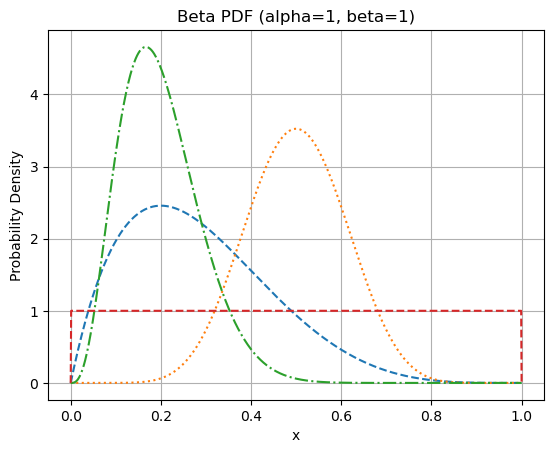

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def B(alpha: float, beta: float) -> float:
    """A normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x <= 0 or x >= 1:
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

def plot_beta_pdf(alpha: float, beta: float,linestyle= '-'):
    x_values = np.linspace(0, 1, 1000)
    y_values = [beta_pdf(x, alpha, beta) for x in x_values]
    plt.plot(x_values, y_values, linestyle=linestyle)
    plt.title(f'Beta PDF (alpha={alpha}, beta={beta})')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)

plot_beta_pdf(2, 5,linestyle="--")
plot_beta_pdf(10,10, linestyle='dotted')
plot_beta_pdf(4,16,linestyle="-." )
plot_beta_pdf(1,1, linestyle="--")
plt.show()

In [4]:
from typing import TypeVar, List, Iterator
T = TypeVar('T') # this allows us to type "generic" functions
def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset),
    batch_size)]
    if shuffle: random.shuffle(batch_starts) # shuffle the batches
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [5]:
import random
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta

NameError: name 'inputs' is not defined

In [1]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(100):
    for x, y in inputs:
    grad = linear_gradient(x, y, theta)
    theta = gradient_step(theta, grad, -learning_rate)

    print(epoch, theta)
slope, intercept = theta

IndentationError: expected an indented block after 'for' statement on line 3 (2763092705.py, line 4)

In [2]:
from typing import Tuple
import math
def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    print("Returns mu and sigma corresponding to a Binomial(n, p)")
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    print("mu",mu)
    print("Sigma",sigma)
    return mu, sigma
normal_approximation_to_binomial(100, 0.5)

Returns mu and sigma corresponding to a Binomial(n, p)
mu 50.0
Sigma 5.0


(50.0, 5.0)

In [2]:
import sys, re
regex = sys.argv[1]
sys.stdin = 'Hello'
for line in sys.stdin:
    if re.search(regex, line):
        sys.stdout.write(line)

In [3]:
import sys
count = 0
for line in sys.stdin:
    count += 1
print(count)

5


In [15]:
import sys
from collections import Counter
try:
    num_words = int(sys.argv[1])
except:
    print("usage:  num_words")
    sys.exit(1) # nonzero exit code indicates error
counter = Counter(word.lower() for line in sys.stdin for word in line.strip().split() if word)
for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

usage:  num_words


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [4]:
# Open files with appropriate modes
file_for_reading = open('reading_file.txt', 'r')
file_for_writing = open('writing_file.txt', 'w')
file_for_appending = open('appending_file.txt', 'a')

# Close the file opened for writing
file_for_writing.close()

# Read data from the file opened for reading
with open('reading_file.txt', 'r') as f:
    data = f.read()  # Assuming function_that_gets_data_from is replaced with read()

# Print or use the data read
print(data)

# Close other open files
file_for_reading.close()
file_for_appending.close()

Hellondcbnnb ds
dbdcbdnc
sxDdsdgvhdd
bdbhjssd


In [6]:
from collections import Counter

def get_domain(email_address: str) -> str:
    """Split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

# a couple of tests
assert get_domain('joelgrus@gmail.com') == 'gmail.com'
assert get_domain('joel@m.datasciencester.com') == 'm.datasciencester.com'

with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                            for line in f
                            if "@" in line)

print(domain_counts)

Counter({'gmail.com': 1})


In [7]:
import csv
import requests
with open('tab_delimited_stock_prices.txt') as f: 
    tab_reader = csv.reader(f, delimiter='\t')
    for row in tab_reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5
6/19/2014 AAPL 91.86
6/19/2014 MSFT 41.51
6/19/2014 FB 64.34


In [8]:
import csv
import requests
with open('colon_delimited_stock_prices.txt') as f:
    colon_reader = csv.DictReader(f, delimiter=':')
    for dict_row in colon_reader:
        date = dict_row["date"]
        symbol = dict_row["symbol"]
        closing_price = float(dict_row["closing_price"])
        print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5


In [5]:
import csv
import requests
todays_prices = {'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5 }
with open('comma_delimited_stock_prices.txt', 'w') as f:
    csv_writer = csv.writer(f, delimiter=',')
    for stock, price in todays_prices.items():
        csv_writer.writerow([stock, price])

In [4]:
import csv
import requests
results = [["test1", "success", "Monday"],
["test2", "success, kind of", "Tuesday"],
["test3", "failure, kind of", "Wednesday"],
["test4", "failure, utter", "Thursday"]]
# don't do this!
with open('bad_csv.txt', 'w') as f:
    for row in results:
        f.write(",".join(map(str, row)))
        f.write("\n")

In [1]:
pip install beautifulsoup4 requests html5lib

Note: you may need to restart the kernel to use updated packages.


In [12]:
from bs4 import BeautifulSoup
import requests
# I put the relevant HTML file on GitHub. In order to fit
# the URL in the book I had to split it across two lines.
# Recall that whitespace-separated strings get concatenated.
url = ("https://raw.githubusercontent.com/"
"joelgrus/data/master/getting-data.html")
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')
first_paragraph = soup.find('p') # or just soup.p
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()
#print(html)
#print(soup)
print(first_paragraph)
print(first_paragraph_text)
print(first_paragraph_words)

<p id="p1">This is the first paragraph.</p>
This is the first paragraph.
['This', 'is', 'the', 'first', 'paragraph.']


In [13]:
from bs4 import BeautifulSoup
import requests
# I put the relevant HTML file on GitHub. In order to fit the URL in the book I had to split it across two lines. Recall that whitespace-separated strings get concatenated.
url = ("https://raw.githubusercontent.com/"
"joelgrus/data/master/getting-data.html")
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')
first_paragraph = soup.find('p') # or just soup.p
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()
first_paragraph_id = soup.p['id'] 		# raises KeyError if no 'id'
first_paragraph_id2 = soup.p.get('id') 		# returns None if no 'id'
print(first_paragraph_id)
print(first_paragraph_id2)

p1
p1


In [14]:
from bs4 import BeautifulSoup
import requests
# I put the relevant HTML file on GitHub. In order to fit the URL in the book I had to split it across two lines. Recall that whitespace-separated strings get concatenated.
url = ("https://raw.githubusercontent.com/"
"joelgrus/data/master/getting-data.html")
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')
first_paragraph = soup.find('p') # or just soup.p
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()
all_paragraphs = soup.find_all('p') # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]
print(all_paragraphs)
print(paragraphs_with_ids)

[<p id="p1">This is the first paragraph.</p>, <p class="important">This is the second paragraph.</p>]
[<p id="p1">This is the first paragraph.</p>]


In [15]:
import requests
url = ("https://raw.githubusercontent.com/"
"joelgrus/data/master/getting-data.html")
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')
first_paragraph = soup.find('p') # or just soup.p
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
if 'important' in p.get('class', [])]
print(important_paragraphs)
print(important_paragraphs2)
print(important_paragraphs3)

[<p class="important">This is the second paragraph.</p>]
[<p class="important">This is the second paragraph.</p>]
[<p class="important">This is the second paragraph.</p>]


In [16]:
import requests
url = ("https://raw.githubusercontent.com/"
"joelgrus/data/master/getting-data.html")
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')
first_paragraph = soup.find('p') # or just soup.p
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()
# Warning: will return the same <span> multiple times  if it sits inside multiple <div>s.  Be more clever if that's the case.
spans_inside_divs = [span
for div in soup('div') # for each <div> on the page
for span in div('span')] # find each <span> inside it
print(spans_inside_divs)

[<span id="name">Joel</span>, <span id="twitter">@joelgrus</span>, <span id="email">joelgrus-at-gmail</span>]


In [1]:
from bs4 import BeautifulSoup
import requests
url = "https://www.india.gov.in/my-government/whos-who/prime-minister"
text = requests.get(url).text
soup = BeautifulSoup(text, "html5lib")
all_urls = [a['href'] for a in soup('a') if a.has_attr('href')]
print(all_urls)
print(len(all_urls))

['https://www.facebook.com/nationalportalofindia', 'https://twitter.com/indiagovin', '#main-content', 'https://www.india.gov.in/user/login', 'https://www.india.gov.in/user/register', 'javascript:;', 'javascript:;', 'javascript:;', 'javascript:void(0);', 'javascript:void(0);', 'https://www.xn--i1bj3fqcyde.xn--11b7cb3a6a.xn--h2brj9c/my-government/whos-who/prime-minister', 'https://www.india.gov.in/', 'javascript:;', '/topics', '/topics/agriculture', '/topics/art-culture', '/topics/commerce', '/topics/communications-it', '/topics/defence', '/topics/education', '/topics/environment-forest', '/topics/finance-taxes', '/topics/food-public-distribution', '/topics/foreign-affairs', '/topics/governance-administration', '/topics/health-family-welfare', '/topics/home-affairs-enforcement', '/topics/housing', '/topics/industries', '/topics/infrastructure', '/topics/information-broadcasting', '/topics/labour-employment', '/topics/law-justice', '/topics/power-energy', '/topics/rural', '/topics/science

In [1]:
from bs4 import BeautifulSoup
import requests
import re
url = "https://www.house.gov/representatives"
text = requests.get(url).text
soup = BeautifulSoup(text, "html5lib")
all_urls = [a['href'] for a in soup('a') if a.has_attr('href')]
# Must start with http:// or https://
# Must end with .house.gov or .house.gov/
regex = r"^https?://.*\.house\.gov/?$"
# Let's write some tests!
assert re.match(regex, "http://joel.house.gov")
assert re.match(regex, "https://joel.house.gov")
assert re.match(regex, "http://joel.house.gov/")
assert re.match(regex, "https://joel.house.gov/")
assert not re.match(regex, "joel.house.gov")
assert not re.match(regex, "http://joel.house.com")
assert not re.match(regex, "https://joel.house.gov/biography")
# And now apply
good_urls = [url for url in all_urls if re.match(regex, url)]
good_urls = list(set(good_urls))
print(len(good_urls)) 

436


In [2]:
from bs4 import BeautifulSoup
import requests
import re
html = requests.get('https://jayapal.house.gov').text
soup = BeautifulSoup(html, 'html5lib')
# Use a set because the links might appear multiple times.
links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}
print(links) 

{'https://jayapal.house.gov/category/press-releases/', 'https://jayapal.house.gov/category/news/'}


In [ ]:
from bs4 import BeautifulSoup
import requests
import re
html = requests.get('https://jayapal.house.gov').text
soup = BeautifulSoup(html, 'html5lib')
# Use a set because the links might appear multiple times.
links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}
print(links) 			# {'/media/press-releases'}
from typing import Dict, Set
press_releases: Dict[str, Set[str]] = {}
for house_url in good_urls:
    html = requests.get(house_url).text
    soup = BeautifulSoup(html, 'html5lib')
    pr_links = {a['href'] for a in soup('a') if 'press releases'in a.text.lower()}
    print(f"{house_url}: {pr_links}")
    press_releases[house_url] = pr_links

In [1]:
from bs4 import BeautifulSoup
import requests
import re
def paragraph_mentions(text: str, keyword: str) -> bool:
    """ Returns True if a <p> inside the text mentions {keyword}"""
    soup = BeautifulSoup(text, 'html5lib')
    paragraphs = [p.get_text() for p in soup('p')]
    print(any(keyword.lower() in paragraph.lower() for paragraph in paragraphs))
    return any(keyword.lower() in paragraph.lower() for paragraph in paragraphs)
text = """<body><h1>Facebook</h1><p>Twitter</p>"""
assert paragraph_mentions(text, "twitter") # is inside a <p>
assert not paragraph_mentions(text, "facebook") # not inside a <p>

True
False


In [2]:
from bs4 import BeautifulSoup
import requests
import re
html = requests.get('https://jayapal.house.gov').text
soup = BeautifulSoup(html, 'html5lib')
for house_url, pr_links in press_releases.items():
    for pr_link in pr_links:
        url = f"{house_url}/{pr_link}"
        text = requests.get(url).text
        if paragraph_mentions(text, 'data'):
               print(f"{house_url}")
    break # done with this house_url

NameError: name 'press_releases' is not defined

In [9]:
import json
serialized = """{ "title" : "Data Science Book",
 "author" : "Joel Grus",
 "publicationYear" : 2019,
 "topics" : [ "data", "science", "data science"] }"""
# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
print(deserialized)
print(deserialized["publicationYear"] == 2019)
print("data Science" in deserialized["topics"])

{'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2019, 'topics': ['data', 'science', 'data science']}
True
False


Counter({0.0: 187, -0.5: 186, -1.0: 152, 0.5: 151, -1.5: 100, 1.0: 82, 1.5: 45, -2.0: 44, 2.0: 22, -2.5: 20, -3.0: 6, 3.0: 3, 3.5: 1, -3.5: 1})


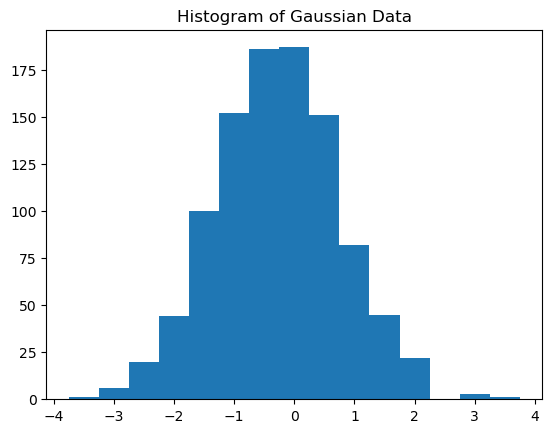

In [7]:
from typing import List, Dict
from collections import Counter
import math
import random
import matplotlib.pyplot as plt
def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    #print(bucket_size * math.floor(point / bucket_size))
    return bucket_size * math.floor(point / bucket_size)
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    print(Counter(bucketize(point, bucket_size) for point in points))
    return Counter(bucketize(point, bucket_size) for point in points)
def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
random.seed(42)
data_points = [random.gauss(0, 1) for _ in range(1000)]
bucket_size = 0.5
plot_histogram(data_points, bucket_size, title="Histogram of Gaussian Data")
plt.show()

In [2]:
pip install scratch

Note: you may need to restart the kernel to use updated packages.


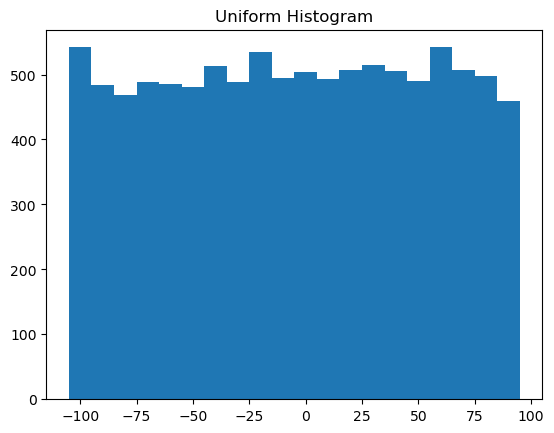

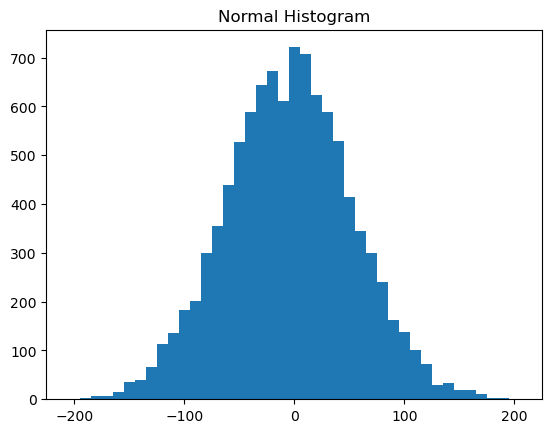

In [6]:
import random
import math
import matplotlib.pyplot as plt
from typing import List, Dict
from collections import Counter

def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1) -> float:
    """Find the approximate inverse of the normal cdf using a binary search"""
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p)

    low_z, low_p = -10.0, 0.0
    high_z, high_p = 10.0, 1.0
    while high_z - low_z > 1e-10:
        mid_z = (low_z + high_z) / 2
        mid_p = (1 + math.erf(mid_z / math.sqrt(2))) / 2
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        else:
            high_z, high_p = mid_z, mid_p

    return mid_z

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()
random.seed(0)
uniform = [200 * random.random() - 100 for _ in range(10000)]

normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]
plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Histogram")

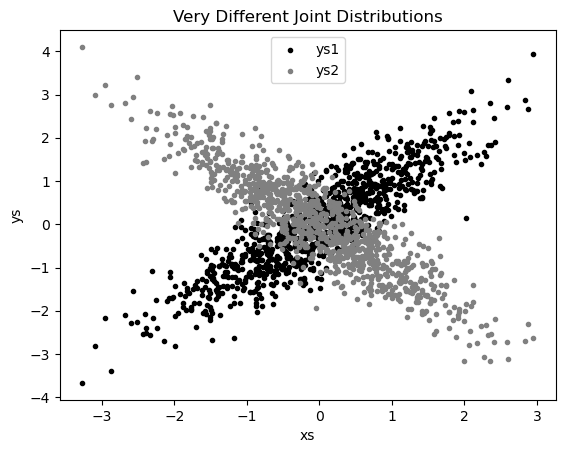

In [17]:
def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [19]:
import math
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    assert len(xs) > 1, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum(x ** 2 for x in deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have the same number of elements"
    return sum(x * y for x, y in zip(de_mean(xs), de_mean(ys))) / (len(xs) - 1)

def correlation(xs: List[float], ys: List[float]) -> float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0  # If no variation, correlation is zero


# Calculating and printing correlations
print(correlation(xs, ys1))  # Should be close to 1.0
print(correlation(xs, ys2))  # Should be close to -1.0

0.8855737304774827
-0.894157860883956


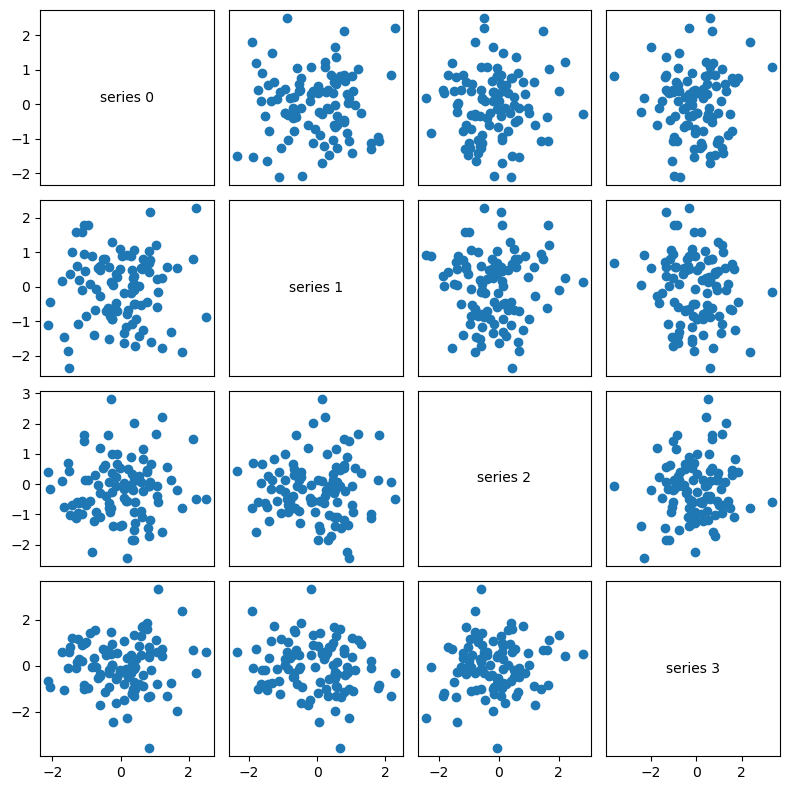

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Sample data for demonstration
# Replace this with actual data
corr_data = [
    np.random.normal(size=100),
    np.random.normal(size=100),
    np.random.normal(size=100),
    np.random.normal(size=100)
]

def correlation(x, y):
    """Calculate Pearson correlation coefficient between two vectors."""
    return pearsonr(x, y)[0]

def make_matrix(nrows, ncols, entry_fn):
    """Create a matrix with the given dimensions and entry function."""
    return [[entry_fn(i, j) for j in range(ncols)] for i in range(nrows)]

def correlation_matrix(data):
    """Returns the len(data) x len(data) matrix whose (i, j)-th entry is the correlation between data[i] and data[j]."""
    def correlation_ij(i, j):
        return correlation(data[i], data[j])
    return make_matrix(len(data), len(data), correlation_ij)

# Calculate the correlation matrix
corr_matrix = correlation_matrix(corr_data)

# Number of vectors
num_vectors = len(corr_data)

# Plotting scatterplot matrix
fig, ax = plt.subplots(num_vectors, num_vectors, figsize=(8, 8))
for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j:
            ax[i, j].scatter(corr_data[j], corr_data[i])
        else:
            ax[i, j].annotate(f"series {i}", (0.5, 0.5),
                              xycoords='axes fraction',
                              ha="center", va="center")
        if i < num_vectors - 1:
            ax[i, j].xaxis.set_visible(False)
        if j > 0:
            ax[i, j].yaxis.set_visible(False)

# Fix the bottom-right and top-left axis labels
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.tight_layout()
plt.show()

In [23]:
import datetime
stock_price = {'closing_price': 100.06, 'date': datetime.date(2014, 8, 29), 'symbol': 'BAPL'}
stock_price['closing_price'] = 103.06
prices: dict[datetime.date, float] = {}
prices[stock_price['date']] = stock_price['closing_price']
print(prices)

{datetime.date(2014, 8, 29): 103.06}


In [21]:
from collections import namedtuple
StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
print(price.symbol == 'MSFT')
print(price.closing_price == 106.03)

True
True


In [37]:
from typing import NamedTuple
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float
    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
print(price.symbol == 'MSFT')
print(price.closing_price == 106.03)
print(price.is_high_tech())

True
True
True


In [43]:
from dataclasses import dataclass
@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float
    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']
price2 = StockPrice2('SFT', datetime.date(2018, 12, 14), 106.03)
print(price2.symbol == 'MSFT')
print(price2.closing_price == 106.03)
print(price2.is_high_tech())

False
True
False


In [50]:
dirty_data = "You're my bestfriend. She's your bestfriend too. But she's awesome!"
APOSTROPHIES = {"'s": " is", "'re": " are"}
words = dirty_data.split()
new_words = []

for word in words:
    for key in APOSTROPHIES.keys():
        if key in word:
            word = word.replace(key, APOSTROPHIES[key])
    new_words.append(word)

clean_data = " ".join(new_words)
print("After the process of data munging: ")
print(clean_data)

After the process of data munging: 
You are my bestfriend. She is your bestfriend too. But she is awesome!


In [2]:
from scratch.linear_algebra import distance
a_to_b = distance([63, 150], [67, 160]) # 10.77
a_to_c = distance([63, 150], [70, 171]) # 22.14
b_to_c = distance([67, 160], [70, 171])
print("a----b")
print(a_to_b)
print("b----c")
print(b_to_c)
print("a----c")
print(a_to_c)
a_to_b = distance([160, 150], [170.2, 160]) # 14.28
a_to_c = distance([160, 150], [177.8, 171]) # 27.53
b_to_c = distance([170.2, 160], [177.8, 171]) # 13.37
print("In centimeter")
print("a----b")
print(a_to_b)
print("b----c")
print(b_to_c)
print("a----c")
print(a_to_c)

a----b
10.770329614269007
b----c
11.40175425099138
a----c
22.135943621178654
In centimeter
a----b
14.284257068535268
b----c
13.370115930686627
a----c
27.52889391167034


In [13]:
from typing import Tuple,List
from scratch.linear_algebra import vector_mean, Vector
from scratch.statistics import standard_deviation
def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the mean and standard deviation for each position"""
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data]) for i in range(dim)]
    return means, stdevs
vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
print(means == [-1, 0, 1])
print(stdevs == [2, 1, 0])

True
True


In [14]:
import matplotlib.pyplot as plt

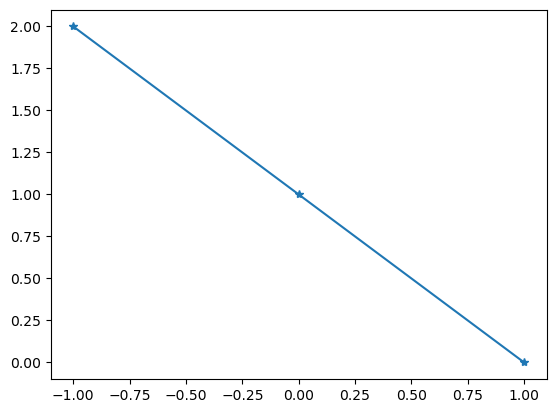

In [22]:
plt.plot(means,stdevs,marker='*')

In [23]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means,stdevs = scale(data)
    # Make a copy of each vector
    rescaled = [v[:] for v in data]
    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]
    return rescaled
means, stdevs = scale(rescale(vectors))
print(means == [0, 0, 1])
print(stdevs == [1, 1, 0])

True
True


In [24]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [26]:
import tqdm
import random
for i in tqdm.tqdm(range(100)):
 # do something slow
 _ = [random.random() for _ in range(1000000)]

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.19it/s]


In [28]:
from typing import List
def primes_up_to(n: int) -> List[int]:
    primes = [2]
    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
            t.set_description(f"{len(primes)} primes")
    return primes
my_primes = primes_up_to(100_000)


9592 primes: 100%|██████████████████████████████████████████████████████████████| 99997/99997 [02:18<00:00, 719.82it/s]


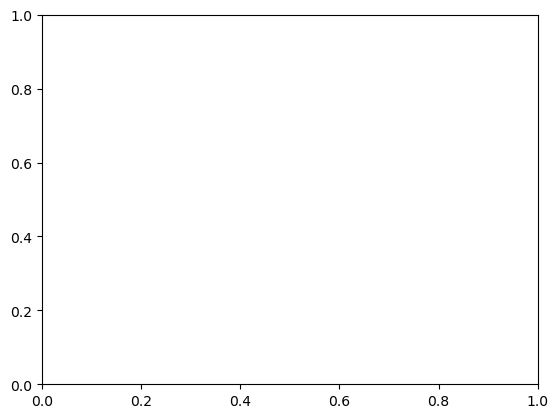

In [5]:
import random
import matplotlib.pyplot as plt
from scratch.probability import inverse_normal_cdf

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
# plt.show()


plt.savefig('im/working_scatter.png')
plt.gca().clear()